# Import Necessary Libraries

In [1]:
# Original subroutines
from puzzle import Puzzle
from search import A_star, manhattan_dist, misplaced_tile

# Unoriginal subroutines for graphing visuals and data analysis
import matplotlib.pyplot as plt
import pandas as pd

# Setup benchmark puzzles

In [2]:
# Taken from Project 1 doc

depth_0 = [1, 2, 3, 4, 5, 6, 7, 8, 0]

depth_2 = [1, 2, 3, 4, 5, 6, 0, 7, 8]

depth_4 = [1, 2, 3, 5, 0, 6, 4, 7, 8]

depth_8 = [1, 3, 6, 5, 0, 7, 4, 8, 2]

depth_16 = [1, 6, 7, 5, 0, 3, 4, 8, 2]

depth_20 = [7, 1, 2, 4, 8, 5, 6, 3, 0]

depth_24 = [0, 7, 2, 4, 6, 1, 3, 5, 8]

benchmark_puzzles = [depth_0, depth_2, depth_4, depth_8, depth_16, depth_20, depth_24]

# Run Algorithm on Benchmarks

In [3]:
column_names = ['heuristic', 'nodes_expanded', 'max_queue_size', 'max_depth', 'time']
results = []

for heuristic in [('Uniform', None), ('Misplaced', misplaced_tile), ('Manhattan', manhattan_dist)]:
    for puz in benchmark_puzzles:
        p = Puzzle(puz)
        result = A_star(p, heuristic[1], quiet = True)
        results.append((heuristic[0],) + result)

df = pd.DataFrame(results, columns=column_names)

# Plot Results

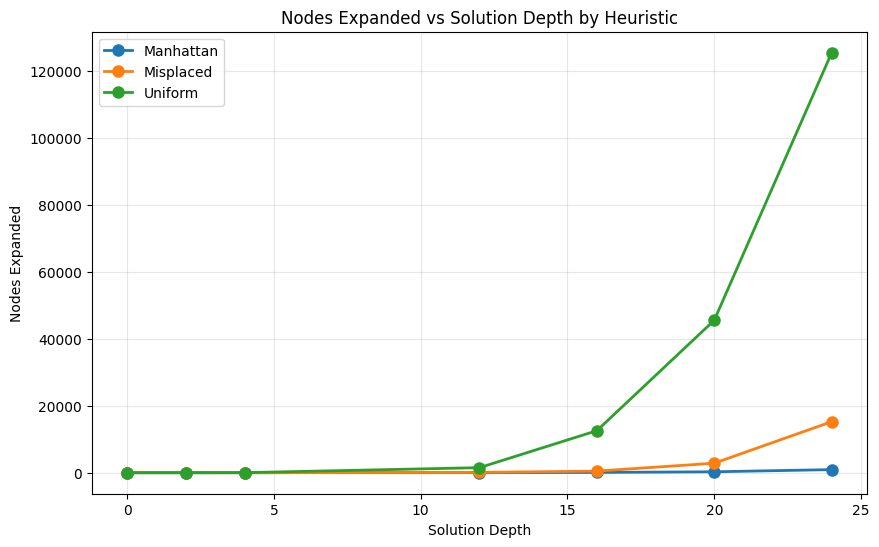

In [12]:
grouped_by_heur = df.groupby('heuristic')

plt.figure(figsize=(10, 6))
for name, group in grouped_by_heur:
    plt.plot(group['max_depth'], group['nodes_expanded'], 
             marker='o', label=name, linewidth=2, markersize=8)

plt.title('Nodes Expanded vs Solution Depth by Heuristic')
plt.xlabel('Solution Depth')
plt.ylabel('Nodes Expanded')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

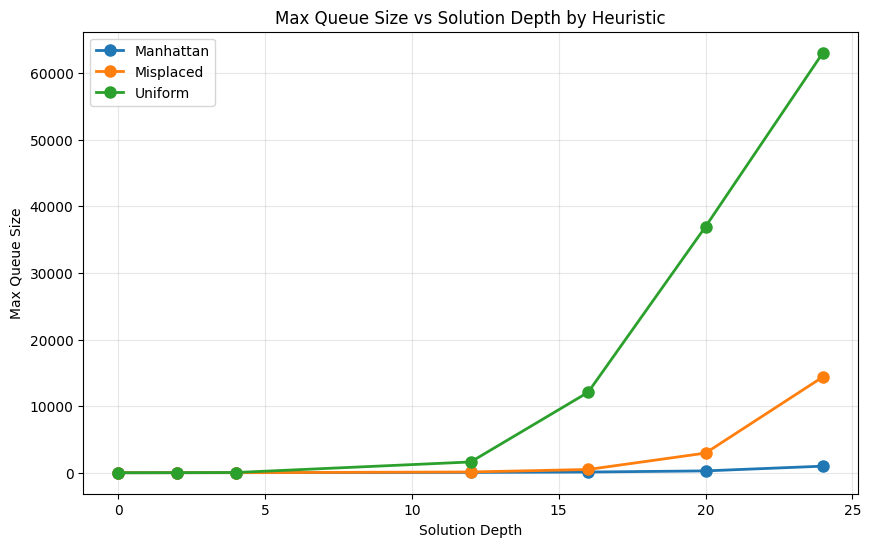

In [13]:
plt.figure(figsize=(10, 6))
for name, group in grouped_by_heur:
    plt.plot(group['max_depth'], group['max_queue_size'], 
             marker='o', label=name, linewidth=2, markersize=8)

plt.title('Max Queue Size vs Solution Depth by Heuristic')
plt.xlabel('Solution Depth')
plt.ylabel('Max Queue Size')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

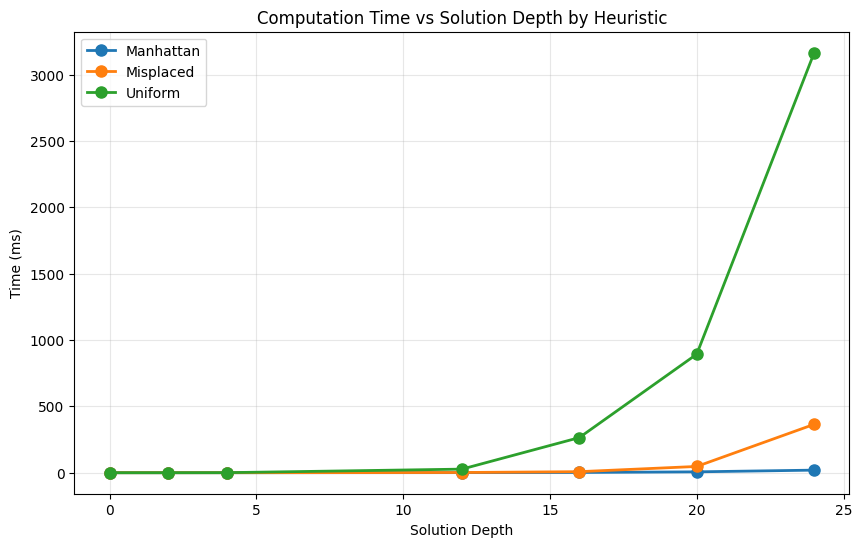

In [15]:
plt.figure(figsize=(10, 6))
for name, group in grouped_by_heur:
    plt.plot(group['max_depth'], group['time'], 
             marker='o', label=name, linewidth=2, markersize=8)

plt.title('Computation Time vs Solution Depth by Heuristic')
plt.xlabel('Solution Depth')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()